In [1]:
%matplotlib widget

import themachinethatgoesping as Ping
import matplotlib.pyplot as plt

In [2]:
data_folders = [
    "/home/data/turbeams/TURBEAMS_data_crunshing/campaigns/TURBEAMS_April_2023/Transect/MOW1-W08/Ship/"
]

In [3]:
files = Ping.echosounders.index_functions.find_files(data_folders, ['.raw'])
cache_files = Ping.echosounders.index_functions.get_cache_file_paths(files)

fh = Ping.echosounders.simradraw.SimradRawFileHandler(files, file_cache_paths=cache_files)
                

Found 46 files
indexing files ⡀ 99% :00s<00m:00s] [Found: 1048351 datagrams in 46 files (19408MB)]                                                
Initializing ping interface ⠐ 98% :00s<00m:00s] [Done]                                              


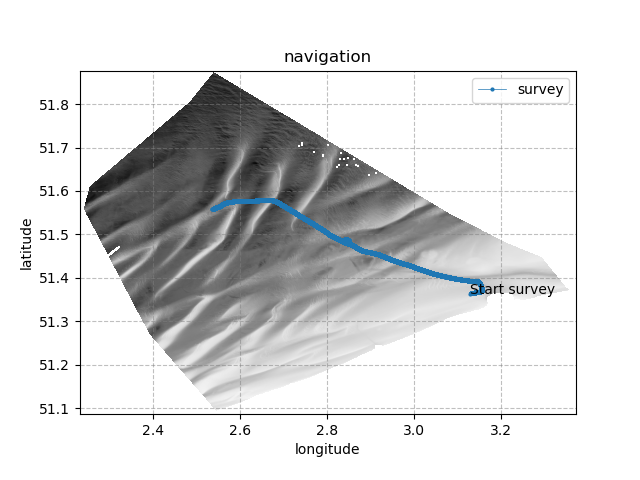

In [4]:
# filter pings by features
all_pings = Ping.pingprocessing.filter_pings.by_features(fh.get_pings(), ['watercolumn.amplitudes'])

o = Ping.pingprocessing.overview.get_ping_overview(all_pings)

fig,ax = Ping.pingprocessing.overview.nav_plot.create_figure(
    'navigation', 
    background_image_path='/home/data/turbeams/TURBEAMS_data_crunshing/campaigns/BPNS_latlon.tiff'
)

o.plot_navigation(ax)
ax.legend()

In [5]:
#split by channel
pings_per_channel = Ping.pingprocessing.split_pings.by_channel_id(all_pings)

for k in pings_per_channel.keys():
    print(k)
    
pings = pings_per_channel['WBT 400050-15 ES70-7C_ES']

WBT 400058-15 ES333-7C_ES
WBT 400040-15 ES38-7_ES
WBT 400050-15 ES70-7C_ES
WBT 400051-15 ES120-7C_ES
WBT 400052-15 ES200-7C_ES


In [6]:
#create a beam/sample filter
pss = Ping.echosounders.pingtools.PingSampleSelector()
pss.select_beam_range_by_angles(-3.5,3.5)

# create echogram
echodata = Ping.pingprocessing.watercolumn.echograms.EchoData.from_pings(
        pings,
        pss=pss,
        wci_value= 'sv/av',
        linear_mean=True,
        verbose=True,
    )

 23%|##2       | 6203/27332 [00:01<00:03, 6202.68it/s]

In [7]:
#build echogram image
max_steps=4000
max_samples=1000

echodata.set_x_axis_date_time(max_steps=max_steps)
echodata.set_y_axis_depth(max_samples=max_samples)
image,extent = echodata.build_image()

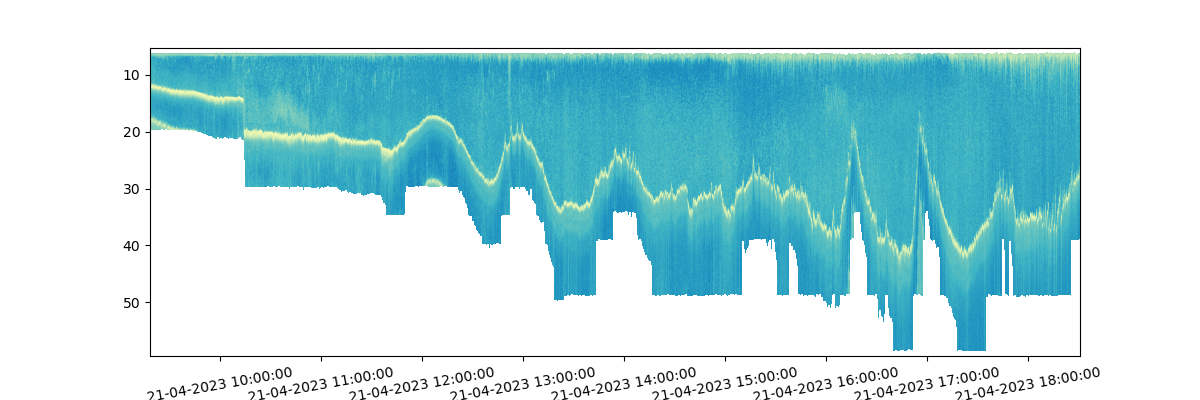

In [8]:
fig,ax = Ping.pingprocessing.core.create_figure('echogram')
fig.set_size_inches(12,4)
Ping.pingprocessing.core.set_ax_timeformat(ax)

ax.imshow(image.transpose(),extent=extent, aspect='auto', cmap='YlGnBu_r')

In [9]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#convert xlim to time
import matplotlib.dates as mdates
tmin,tmax = [t.timestamp() for t in mdates.num2date(xlim)]

echodata.set_x_axis_date_time(min_ping_time=tmin, max_ping_time=tmax, max_steps=max_steps)
echodata.set_y_axis_depth(min_depth=ylim[1],max_depth=ylim[0], max_samples=max_samples)
image,extent = echodata.build_image()
ax.imshow(image.transpose(),extent=extent, aspect='auto', cmap='YlGnBu_r')